In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('C:\\Users\\filip.ilic\\Desktop\\NORD\\jobfair_train.csv')
df_train

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55309,173,14278145,2906514,0) NonPayer,2,25,4.160909,3.948086,0.503241,11,...,Switzerland,iOS Phone,13,25,NaN,42,10,25,37,1
55310,173,14309556,2906913,2) Minnow,2,21,4.244145,3.762286,0.664514,28,...,France,iOS Phone,25,167,NaN,214,158,358,256,1
55311,173,14455654,2905985,0) NonPayer,1,21,4.000158,3.753276,0.507620,6,...,France,iOS Tablet,14,17,NaN,73,11,70,57,11
55312,173,13623733,2910437,0) NonPayer,5,24,4.582158,4.461391,0.664767,28,...,Morocco,Android Phone,22,80,4.0,90,65,109,150,5


# Exploratory Data Analysis

In [3]:
df_train.isnull().sum()

season                                         0
club_id                                        0
league_id                                      0
dynamic_payment_segment                        0
cohort_season                                  0
avg_age_top_11_players                         0
avg_stars_top_11_players                       0
avg_stars_top_14_players                       0
avg_training_factor_top_11_players             0
days_active_last_28_days                       0
league_match_watched_count_last_28_days        0
session_count_last_28_days                     0
playtime_last_28_days                          0
registration_country                           0
registration_platform_specific                 0
league_match_won_count_last_28_days            0
training_count_last_28_days                    0
global_competition_level                   17551
tokens_spent_last_28_days                      0
tokens_stash                                   0
rests_stash         

In [4]:
df_train.describe()

,season,club_id,league_id,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
count,55314.0,5.531400e+04,5.531400e+04,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,5.531400e+04,55314.000000,55314.000000,37763.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000
mean,173.0,1.210977e+07,2.909804e+06,23.409372,23.718661,4.533516,4.344776,0.584372,12.357089,3.623170,63.432169,2.955178e+07,12.411813,61.107694,3.901014,121.393897,113.133077,283.083523,307.085964,7.500000
std,0.0,3.384016e+06,2.102140e+03,42.009274,2.206240,1.204753,1.177068,0.178090,11.849102,5.906055,101.831670,5.233892e+07,6.403013,188.288285,2.625576,842.775529,3183.550398,789.250959,823.362486,4.031165
min,173.0,2.750000e+02,2.904743e+06,1.000000,18.000000,1.451697,1.354905,-1.287736,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-4975.000000,-169.000000,0.000000,1.000000
25%,173.0,1.151105e+07,2.907961e+06,2.000000,22.000000,3.691136,3.500062,0.479571,1.000000,0.000000,1.000000,7.364150e+04,8.000000,0.000000,1.000000,0.000000,11.000000,41.000000,52.000000,4.000000
50%,173.0,1.392822e+07,2.910038e+06,4.000000,23.000000,4.481376,4.311590,0.561158,7.000000,0.000000,16.000000,6.230431e+06,12.000000,11.000000,3.000000,38.000000,29.000000,88.000000,118.000000,7.500000
75%,173.0,1.424454e+07,2.911697e+06,17.000000,25.000000,5.217394,5.021726,0.648180,27.000000,5.000000,89.000000,3.768711e+07,17.000000,63.000000,6.000000,107.000000,73.000000,243.000000,281.000000,11.000000
max,173.0,1.451477e+07,2.912940e+06,172.000000,33.000000,23.716073,20.434876,5.164494,28.000000,26.000000,1365.000000,1.340479e+09,26.000000,7443.000000,11.000000,120233.000000,744202.000000,32767.000000,32767.000000,14.000000


In [5]:
df_train.describe(include=['O'])

,dynamic_payment_segment,registration_country,registration_platform_specific
count,55314,55314,55314
unique,5,186,11
top,0) NonPayer,Indonesia,Android Phone
freq,41843,9830,35859


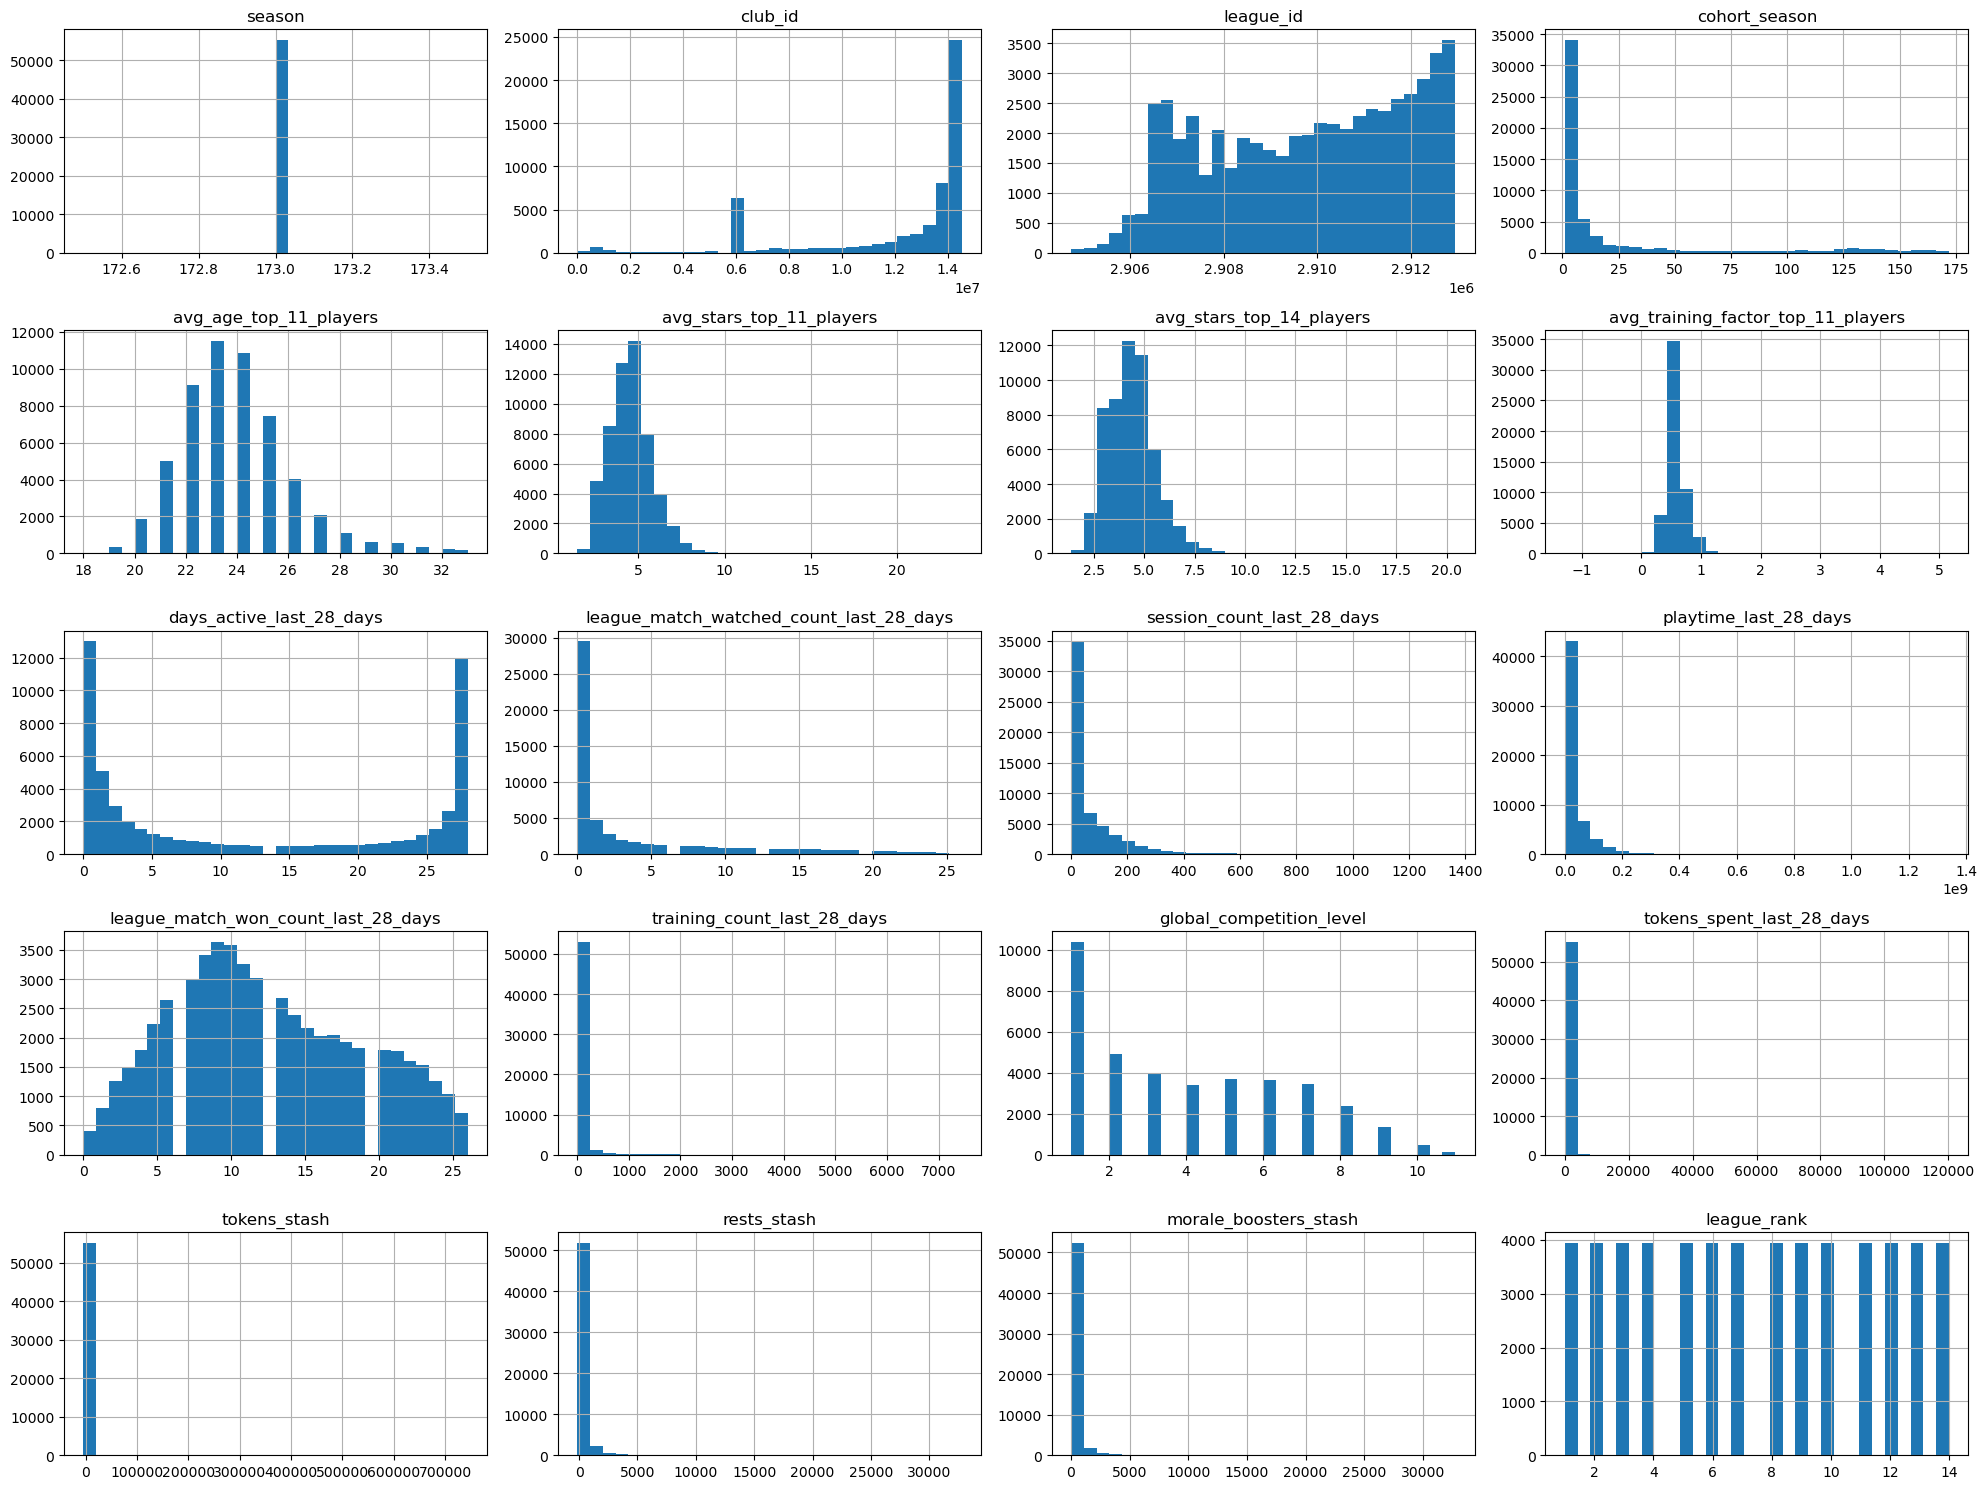

In [6]:
df_train.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

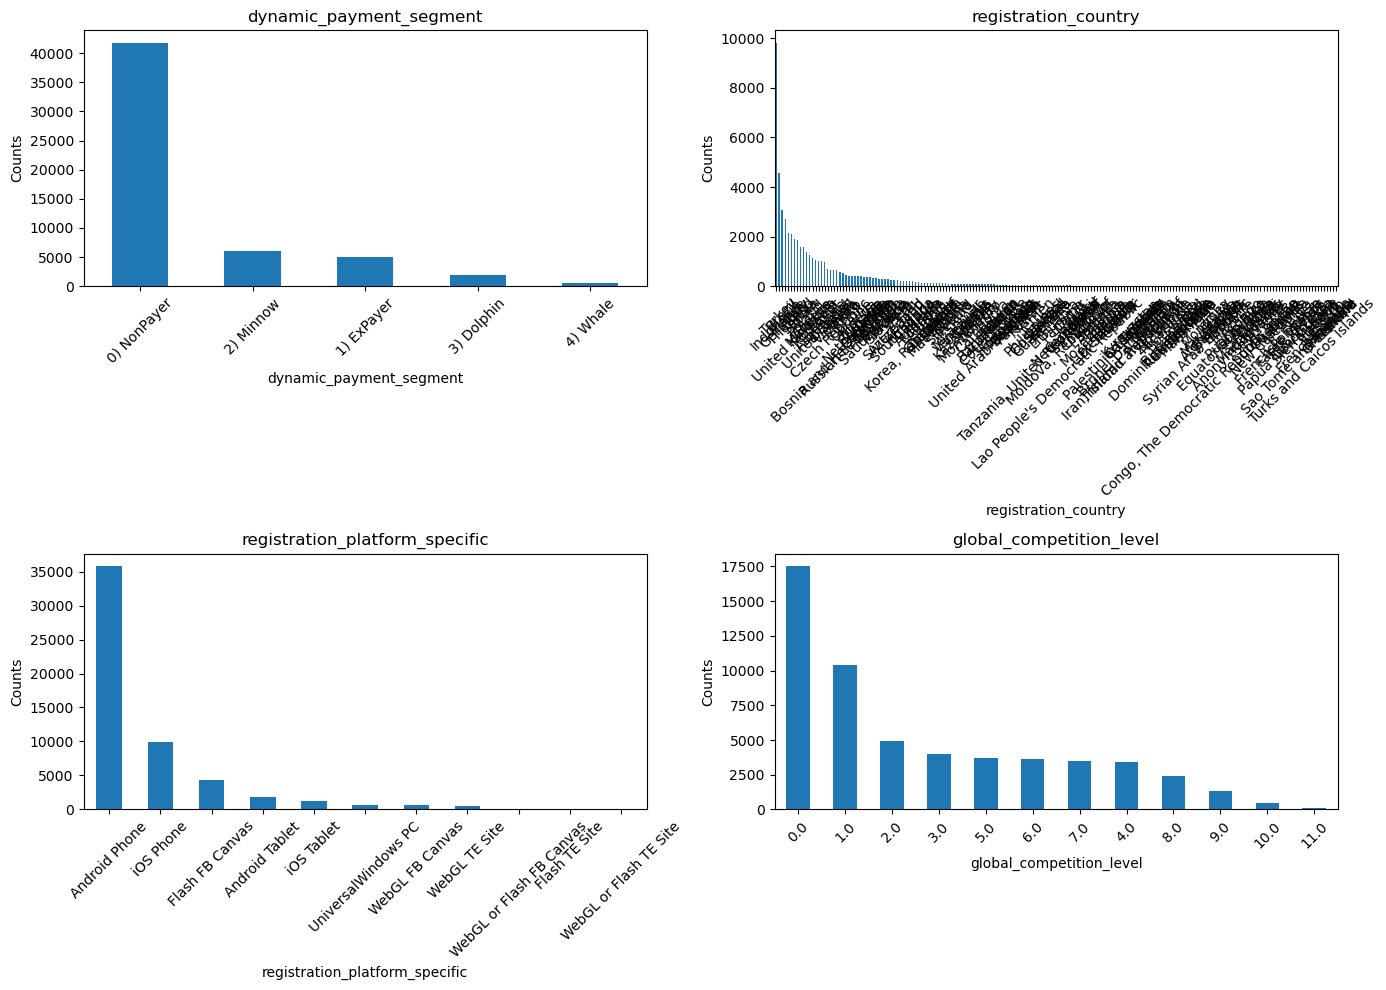

In [7]:
df_train['global_competition_level'] = df_train['global_competition_level'].fillna(0)

categorical_columns = [
    'dynamic_payment_segment',
    'registration_country',
    'registration_platform_specific',
    'global_competition_level'
]

# Set up the figure size and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten() 

# Plot each categorical variable's value counts in a bar plot
for i, col in enumerate(categorical_columns):
    value_counts = df_train[col].value_counts()
    ax = value_counts.plot(kind='bar', ax=axes[i], title=col)
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
    plt.sca(axes[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df_train[col].value_counts())
    print("\n")

Value counts for dynamic_payment_segment:
0) NonPayer    41843
2) Minnow       6047
1) ExPayer      5025
3) Dolphin      1854
4) Whale         545
Name: dynamic_payment_segment, dtype: int64


Value counts for registration_country:
Indonesia    9830
Turkey       4563
Brazil       3080
Germany      2722
France       2144
             ... 
Lesotho         1
Bahamas         1
Greenland       1
Anguilla        1
Gambia          1
Name: registration_country, Length: 186, dtype: int64


Value counts for registration_platform_specific:
Android Phone               35859
iOS Phone                    9896
Flash FB Canvas              4340
Android Tablet               1867
iOS Tablet                   1214
UniversalWindows PC           724
WebGL FB Canvas               702
WebGL TE Site                 489
WebGL or Flash FB Canvas      129
Flash TE Site                  77
WebGL or Flash TE Site         17
Name: registration_platform_specific, dtype: int64


Value counts for global_competition_le

In [9]:
def bin_countries(country, high_threshold=2000, low_threshold=200):
    if country_counts[country] > high_threshold:
        return 'High Frequency'
    elif high_threshold >= country_counts[country] > low_threshold:
        return 'Medium Frequency'
    elif low_threshold >= country_counts[country] > 1:
        return 'Low Frequency'
    else:
        return 'Other'
    
def bin_platform(platform):
    if 'Phone' in platform:
        return 'Phone'
    elif 'Tablet' in platform:
        return 'Tablet'
    elif 'PC' in platform or 'Flash TE Site' in platform:
        return 'PC'
    else:
        return 'Web'
    
country_counts = df_train['registration_country'].value_counts()
df_train['registration_country_binned'] = df_train['registration_country'].apply(bin_countries)

df_train['registration_platform_binned'] = df_train['registration_platform_specific'].apply(bin_platform)    

 I analyzed and preprocessed key categorical variables in the dataset. I explored the distribution of user segments in dynamic_payment_segment and binned registration_country and registration_platform_specific into broader categories. This approach simplifies the data, making it more manageable for my machine learning model.

<AxesSubplot:>

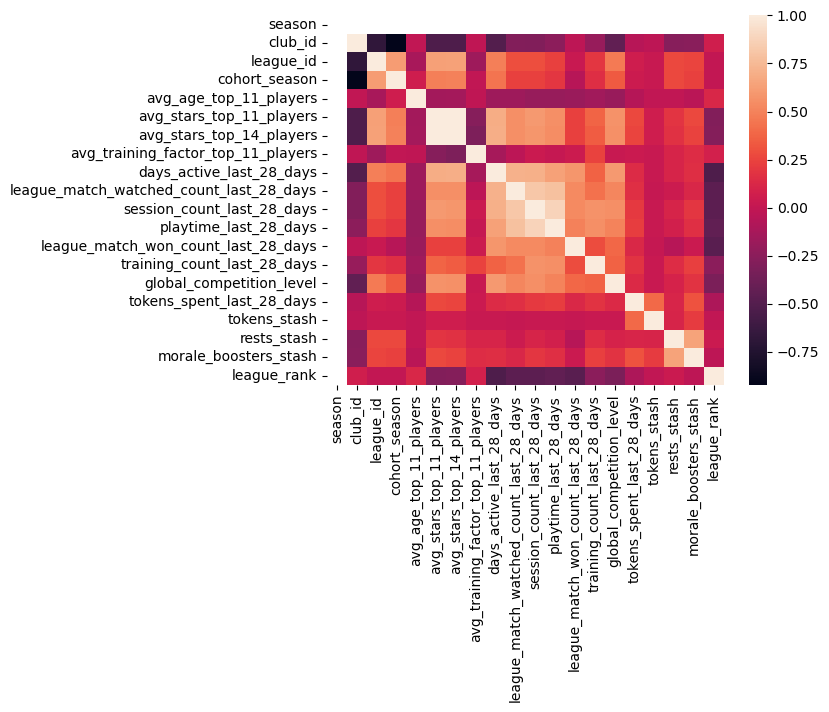

In [10]:
sns.heatmap(df_train.corr())

In [11]:
correlation_matrix = df_train.corr()
correlation_matrix = correlation_matrix.abs()

# We will consider a threshold of 0.75 for high correlation
highly_correlated_features = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                              .stack()
                              .sort_values(ascending=False))

# Filter out pairs with high correlation
high_correlation_pairs = highly_correlated_features[highly_correlated_features > 0.75]
print(high_correlation_pairs)

avg_stars_top_11_players                 avg_stars_top_14_players      0.996793
club_id                                  cohort_season                 0.922520
session_count_last_28_days               playtime_last_28_days         0.875274
league_match_watched_count_last_28_days  session_count_last_28_days    0.817395
                                         playtime_last_28_days         0.784784
dtype: float64


 I identified highly correlated features in the dataset by computing a correlation matrix and setting a threshold of 0.75 for high correlation. Upon discovering a strong correlation between avg_stars_top_11_players and avg_stars_top_14_players, I decided to drop avg_stars_top_14_players to reduce redundancy and improve model performance.

# Outliers Detection

In [12]:
from sklearn.ensemble import IsolationForest

df_train = df_train.drop(['avg_stars_top_14_players', 'season','registration_country','registration_platform_specific'], axis=1)

excluded_columns = ['club_id', 'league_id', 'league_rank']
categorical_columns = ['dynamic_payment_segment', 'registration_country_binned', 'registration_platform_binned', 'global_competition_level']
columns_to_use = df_train.drop(columns=excluded_columns + categorical_columns).select_dtypes(include=[np.number]).columns.tolist()
df_numerical_features = df_train[columns_to_use]

# Initialize the IsolationForest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(df_numerical_features)
labels = iso_forest.predict(df_numerical_features)

# Filter out the outliers from the numerical feature set
df_numerical_features_filtered = df_numerical_features[labels == 1]

# Reattach the excluded columns to the filtered dataset
df_train_filtered = df_train.loc[df_numerical_features_filtered.index, :]

In [35]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Function to plot box plots before and after removing outliers side by side
def plot_box_plots_side_by_side(df_before, df_after, columns):
    for column in columns:
        fig = make_subplots(rows=1, cols=2, subplot_titles=('Before Outlier Removal', 'After Outlier Removal'))
        fig.add_trace(go.Box(y=df_before[column], name='Original'), row=1, col=1)
        fig.add_trace(go.Box(y=df_after[column], name='Filtered'), row=1, col=2)
        fig.update_layout(height=400, width=800, title_text=f"Box Plot for {column}")
        fig.show()

#plot_box_plots_side_by_side(df_train, df_train_filtered, columns_to_use)


In [14]:
df_train_filtered_sorted = df_train_filtered.sort_values(by=['league_id', 'league_rank'])
df_train_filtered_sorted

,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,...,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank,registration_country_binned,registration_platform_binned
17104,14460231,2904743,0) NonPayer,1,22,4.707321,0.635587,15,1,97,...,11,124,6.0,2021,25,32,79,1,High Frequency,Phone
17156,14478891,2904743,0) NonPayer,1,23,4.512800,0.464074,10,3,75,...,10,43,2.0,106,7,0,67,2,Medium Frequency,Tablet
17176,14493949,2904743,0) NonPayer,1,23,3.573358,0.538171,5,1,5,...,2,7,0.0,43,26,18,23,3,Medium Frequency,Phone
17205,14437898,2904743,0) NonPayer,1,21,3.936582,0.530063,3,0,14,...,11,24,3.0,65,21,17,59,4,High Frequency,Phone
17219,14478979,2904743,0) NonPayer,1,23,3.920945,0.552545,12,9,26,...,9,24,0.0,91,3,16,7,5,High Frequency,Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,477562,2912930,2) Minnow,166,23,7.035612,0.525636,28,2,184,...,10,159,6.0,494,120,100,91,12,Medium Frequency,Web
9716,6042788,2912931,2) Minnow,158,24,8.302133,0.490373,0,0,0,...,0,0,0.0,0,16,226,38,14,Medium Frequency,Web
112,6044238,2912933,2) Minnow,132,25,8.602497,0.464952,28,12,133,...,5,56,2.0,100,32,85,11,6,Medium Frequency,Phone
18665,6042985,2912936,2) Minnow,148,24,7.227345,0.655972,28,3,97,...,13,282,0.0,75,96,59,157,12,Medium Frequency,Web


In [15]:
# Find 'league_id's with less than 14 rows
league_counts = df_train_filtered_sorted['league_id'].value_counts()
leagues_with_less_than_14 = league_counts[league_counts < 14]

print(leagues_with_less_than_14)

2912609    13
2912116    13
2911239    13
2912602    13
2912014    13
           ..
2912915     1
2910565     1
2912907     1
2912877     1
2912938     1
Name: league_id, Length: 1676, dtype: int64


In [16]:
leagues_to_drop = leagues_with_less_than_14.index
df_train_filtered_sorted_clean = df_train_filtered_sorted[~df_train_filtered_sorted['league_id'].isin(leagues_to_drop)]

df_train_filtered_sorted_clean

,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,...,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank,registration_country_binned,registration_platform_binned
17104,14460231,2904743,0) NonPayer,1,22,4.707321,0.635587,15,1,97,...,11,124,6.0,2021,25,32,79,1,High Frequency,Phone
17156,14478891,2904743,0) NonPayer,1,23,4.512800,0.464074,10,3,75,...,10,43,2.0,106,7,0,67,2,Medium Frequency,Tablet
17176,14493949,2904743,0) NonPayer,1,23,3.573358,0.538171,5,1,5,...,2,7,0.0,43,26,18,23,3,Medium Frequency,Phone
17205,14437898,2904743,0) NonPayer,1,21,3.936582,0.530063,3,0,14,...,11,24,3.0,65,21,17,59,4,High Frequency,Phone
17219,14478979,2904743,0) NonPayer,1,23,3.920945,0.552545,12,9,26,...,9,24,0.0,91,3,16,7,5,High Frequency,Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21721,6038394,2912680,0) NonPayer,153,23,4.674449,0.610651,21,3,47,...,10,49,1.0,6,82,178,364,10,High Frequency,Web
29660,6046297,2912680,1) ExPayer,133,20,5.479273,0.435379,27,5,70,...,3,36,6.0,89,138,141,730,11,Medium Frequency,Web
29633,6037835,2912680,1) ExPayer,128,28,5.297358,0.663015,16,3,36,...,13,67,3.0,45,12,661,7,12,Medium Frequency,Web
29721,488976,2912680,1) ExPayer,163,25,5.152497,0.514169,6,0,8,...,9,14,5.0,0,42,183,1517,13,Low Frequency,Web


I focused on ensuring that the training dataset contains complete data for each league. After counting the number of rows for each league_id, I identified and listed leagues with less than 14 teams. Recognizing that incomplete league data could skew the model's training, I chose to exclude these leagues from the dataset. This decision ensures that the training data reflects only those leagues where all 14 teams are present, maintaining consistency and reliability in the dataset for model training.

# Feature Engineering

In [17]:
df_train_filtered_sorted_clean['avg_age_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['avg_age_top_11_players'].transform('mean')
df_train_filtered_sorted_clean['std_age_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['avg_age_top_11_players'].transform('std')

df_train_filtered_sorted_clean['std_avg_stars_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['avg_stars_top_11_players'].transform('std')
df_train_filtered_sorted_clean['avg_stars_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['avg_stars_top_11_players'].transform('mean')

df_train_filtered_sorted_clean['avg_training_factor_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['avg_training_factor_top_11_players'].transform('std')
df_train_filtered_sorted_clean['std_training_factor_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['avg_training_factor_top_11_players'].transform('mean')

df_train_filtered_sorted_clean['avg_activeday_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['days_active_last_28_days'].transform('mean')
df_train_filtered_sorted_clean['std_activeday_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['days_active_last_28_days'].transform('std')

df_train_filtered_sorted_clean['avg_matchwatched_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['league_match_watched_count_last_28_days'].transform('mean')
df_train_filtered_sorted_clean['std_matchwatched_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['league_match_watched_count_last_28_days'].transform('std')

df_train_filtered_sorted_clean['avg_session_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['session_count_last_28_days'].transform('mean')
df_train_filtered_sorted_clean['std_session_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['session_count_last_28_days'].transform('std')

df_train_filtered_sorted_clean['avg_playtime_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['playtime_last_28_days'].transform('mean')
df_train_filtered_sorted_clean['std_playtime_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['playtime_last_28_days'].transform('std')

df_train_filtered_sorted_clean['avg_won_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['league_match_won_count_last_28_days'].transform('mean')
df_train_filtered_sorted_clean['std_won_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['league_match_won_count_last_28_days'].transform('std')

df_train_filtered_sorted_clean['avg_training_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['training_count_last_28_days'].transform('mean')
df_train_filtered_sorted_clean['std_training_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['training_count_last_28_days'].transform('std')

df_train_filtered_sorted_clean['avg_tokenspent_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['tokens_spent_last_28_days'].transform('mean')
df_train_filtered_sorted_clean['std_tokenspent_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['tokens_spent_last_28_days'].transform('std')

df_train_filtered_sorted_clean['avg_tokenstash_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['tokens_stash'].transform('mean')
df_train_filtered_sorted_clean['std_tokenstash_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['tokens_stash'].transform('std')

df_train_filtered_sorted_clean['avg_restsstash_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['rests_stash'].transform('mean')
df_train_filtered_sorted_clean['std_restsstash_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['rests_stash'].transform('std')

df_train_filtered_sorted_clean['avg_mbstash_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['morale_boosters_stash'].transform('mean')
df_train_filtered_sorted_clean['std_mbstash_within_league'] = df_train_filtered_sorted_clean.groupby('league_id')['morale_boosters_stash'].transform('std')


In [18]:
df_train_filtered_sorted_clean['dynamic_payment_segment'] = df_train_filtered_sorted_clean['dynamic_payment_segment'].str[0]
df_train_filtered_sorted_clean = pd.get_dummies(df_train_filtered_sorted_clean, columns=['dynamic_payment_segment', 'registration_country_binned', 'registration_platform_binned'])

In this step, I focused on feature engineering to capture the patterns within each league, recognizing that every club in a league should be considered as part of the same group. Since league_id is a random number without inherent predictive value, I chose to exclude it directly from the model. Instead, I derived statistical measures such as the mean and standard deviation for various features, all calculated within each league. This approach allows me to capture the relative performance and behavior of clubs within their respective leagues, providing a more nuanced and contextually relevant set of features for the model. This is crucial for understanding and predicting league ranks, as it aligns the features with the competitive dynamics of each league.

# Splitting Data - Training and Validation

In [19]:
from sklearn.model_selection import train_test_split

grouped = df_train_filtered_sorted_clean.groupby('league_id').groups
grouped_indices = [indices for _, indices in grouped.items()]

# Split the groups into training and test sets
train_indices, test_indices = train_test_split(grouped_indices, test_size=0.2, random_state=42)

# Flatten the list of indices for training and test sets
train_indices_flat = [index for indices in train_indices for index in indices]
test_indices_flat = [index for indices in test_indices for index in indices]

# Create the training and test sets
train_set = df_train_filtered_sorted_clean.loc[train_indices_flat]
test_set = df_train_filtered_sorted_clean.loc[test_indices_flat]

y_train = train_set['league_rank']
y_test = test_set['league_rank']

X_train = train_set.drop(['league_rank', 'club_id', 'league_id'], axis=1)
X_test = test_set.drop(['league_rank', 'club_id', 'league_id'], axis=1)


I employed a group-wise splitting strategy to separate the data into training and test sets, ensuring that all clubs from the same league are grouped together. This method is crucial as it preserves the league-wise context in both training and testing phases, preventing data leakage and ensuring that the model learns to generalize across different leagues. This approach is particularly important in a league-based prediction scenario, where the relative performance within a league is more significant than individual club performance across different leagues.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

preprocessing = StandardScaler()

pipelines = {
    'LinearRegression': Pipeline([
        ('preprocess', preprocessing),
        ('model', LinearRegression())
    ]),
    'DecisionTree': Pipeline([
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('model', xgb.XGBRegressor(random_state=42))
    ])
}

In [29]:
cv_scores = {}

# Performing cross-validation for each model
for name, pipeline in pipelines.items():
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_scores[name] = -score.mean()  # Negating the scores because cross_val_score returns negative MAE

# Displaying the cross-validation scores
cv_scores

{'LinearRegression': 2.1035317274871894,
 'DecisionTree': 2.7322539976559566,
 'RandomForest': 1.9970937578625652,
 'GradientBoosting': 2.0068278344431656,
 'XGBoost': 2.0155868675992665}

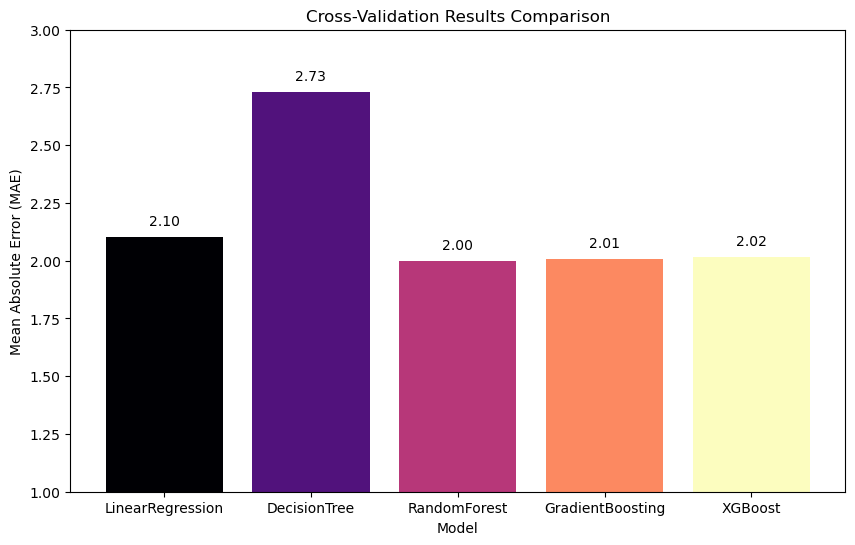

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap('magma') 
colors = cmap(np.linspace(0, 1, len(cv_scores)))

plt.bar(cv_scores.keys(), cv_scores.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Cross-Validation Results Comparison')
plt.ylim([1, 3])

for i, v in enumerate(cv_scores.values()):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', color='black')

plt.show()


In this phase of model training and evaluation, I utilized cross-validation to assess the performance of five different regression models: Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost. The Random Forest model emerged as the most accurate, achieving the lowest mean absolute error (MAE), closely followed by Gradient Boosting and XGBoost. The Decision Tree model showed a higher MAE, possibly due to overfitting. These results guide the selection of the most effective model for predicting league ranks, with Random Forest as the leading candidate.

# Identify and Export the Best Model

In [31]:
best_model_name = min(cv_scores, key=cv_scores.get)
best_pipeline = pipelines[best_model_name]
best_pipeline.fit(X_train, y_train)

predicted_league_ranks = best_pipeline.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predicted_league_ranks)

1.9868455003146632

After identifying the Random Forest model as the most effective based on cross-validation, I fitted this model to the training data and used it to predict league ranks on the test (validation) set. The performance was evaluated using the mean absolute error (MAE), resulting in a MAE of 1.9868. This indicates a high level of precision in the model's predictions, confirming the suitability of the Random Forest model for accurately predicting league ranks in the dataset.

In [33]:
from joblib import dump

model_path = "C:\\Users\\filip.ilic\\Desktop\\NORD\\best_model.joblib"
dump(best_pipeline, model_path)

['C:\\Users\\filip.ilic\\Desktop\\NORD\\best_model.joblib']